<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_18_Matplotlib Box Plots.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
pay_df = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
pay_df = df.explode(column='job_skills')
demand_df = pay_df.copy()

In [3]:
pay_df = pay_df.pivot_table(index='job_skills', values='salary_year_avg', aggfunc='median').sort_values(by='salary_year_avg', ascending=False).head(10)

demand_top_ten = list(demand_df['job_skills'].value_counts().head(10).index)
demand_df = demand_df[demand_df['job_skills'].isin(demand_top_ten)]
demand_df = demand_df.pivot_table(index='job_skills', values='salary_year_avg', aggfunc='median').sort_values(by='salary_year_avg', ascending=False).head(10)

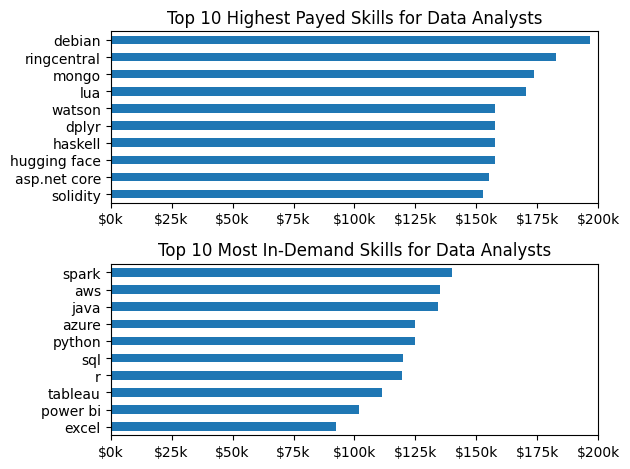

In [7]:
fig, ax = plt.subplots(2, 1)

pay_df.plot(kind='barh', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Top 10 Highest Payed Skills for Data Analysts')
ax[0].legend().remove()
ax[0].set_xlim(0, 200000)
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))


demand_df.plot(kind='barh', ax=ax[1])
ax[1].invert_yaxis()
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].legend().remove()
ax[1].set_xlim(0, 200000)
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))

fig.tight_layout()